In [1]:

from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json
def extract_district (x):
    return list(map(lambda a: a["District"], x))[0]
data_rqst = requests.get("http://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data_t = pd.DataFrame(json.loads(data_rqst.content),columns = ["NumOfVisitors", "CommonName","ObjectAddress"]).fillna(value=0)
data_t["District"] = data_t["ObjectAddress"].apply(extract_district)
print (data_t.head())



   NumOfVisitors                             CommonName  \
0        30800.0                         Библиотека №56   
1        45840.0                        Библиотека №140   
2        25672.0         Библиотека №166 имени 1-го Мая   
3        30494.0             Библиотека №169 «Проспект»   
4         9216.0  Библиотека №266 имени К.И. Чуковского   

                                       ObjectAddress                  District  
0  [{'PostalCode': '127562', 'District': 'район О...            район Отрадное  
1  [{'PostalCode': '115598', 'District': 'район Б...  район Бирюлёво Восточное  
2  [{'PostalCode': '119334', 'District': 'Донской...             Донской район  
3  [{'PostalCode': '117513', 'District': 'район Т...         район Тёплый Стан  
4  [{'PostalCode': '142784', 'District': 'поселен...      поселение Внуковское  


In [2]:
from PyPDF2 import PdfMerger, PdfReader
from PIL import Image

In [3]:
data_t = data_t.groupby("District").sum("NumOfVisitors").sort_values("NumOfVisitors", ascending=False)
data_20 = data_t[0:19]
print (data_20)


                              NumOfVisitors
District                                   
Басманный район                    765402.0
район Чертаново Северное           559500.0
Даниловский район                  504200.0
Красносельский район               284078.0
Тверской район                     225600.0
Пресненский район                  198155.0
район Хамовники                    185730.0
район Арбат                        174643.0
район Коньково                     169417.0
Гагаринский район                  163857.0
Таганский район                    156566.0
район Солнцево                     156168.0
район Нагатино-Садовники           127851.0
район Северное Бутово              121887.0
район Орехово-Борисово Южное       114641.0
район Бибирево                     109822.0
район Лефортово                    103994.0
район Замоскворечье                103521.0
район Марьино                      103341.0


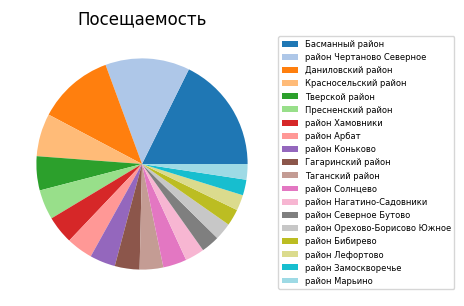

In [35]:
fig = plt.figure(figsize=(5,3))
area = fig.add_subplot(1, 1, 1)
area.set_title("Посещаемость", fontsize=12)
data_20["NumOfVisitors"].plot.pie(ax = area,  labels=[""]*20, label="", cmap="tab20")
plt.legend(data_20.index, bbox_to_anchor=(1,1,0.1,0), fontsize=6)
plt.subplots_adjust(bottom=0, left=-0.4) #сдвигаем графиг к левому краю
plt.savefig('libr.png') # сохраняем график ввиде рисунка

In [61]:
pdfmetrics.registerFont(TTFont('Trebuchet', 'Trebuchet.ttf'))
PDF = canvas.Canvas("libr.pdf", pagesize=pagesizes.A4)
PDF.setFont("Trebuchet", 36)
PDF.drawString(100, 720, "Библиотеки Москвы")
PDF.setFont("Trebuchet", 16)
PDF.drawString(125, 680, "20 лучших районов по посещаемости")
PDF.setFont("Trebuchet", 8)
PDF.drawString(450, 820, "2")
PDF.drawImage(ImageReader("libr.png"), 55, 360) #подгружаем рисунок  указав точки кординат
PDF.setFont("Trebuchet", 14)
PDF.drawString(100, 200, "В самом популярном районе колличество посетителей: " + str(int(data_20["NumOfVisitors"].values[0])))
PDF.save()

In [52]:
files = ["title.pdf", "libr.pdf"]
merger = PdfMerger()
for filename in files:
    merger.append(PdfReader(open(filename, "rb")))
merger.add_metadata({
    '/Producer': "ITtensive",
    '/Author': "ITtensive_Student_Cheremin",
    '/Creator': "ITtensive Python Advanced - www.ittensive.com",
    '/Copyright': "ITtensive 2022",
    '/Title': "Статистика посещений Библиотек москвы"
})
merger.write("M_Libr.pdf")